In [76]:
# Import libraries
import pandas as pd
import numpy as np
import geopy
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point

In [77]:
# Read in airbnbs data (https://insideairbnb.com/get-the-data/) for Toronto 2023 December
df1 = pd.read_csv(r'D:\Documents\Data Analyst Portfolio Workspace\6-Airbnbs\raw-toronto\listings.csv')
df2 = pd.read_csv(r'D:\Documents\Data Analyst Portfolio Workspace\6-Airbnbs\raw-toronto\reviews.csv')
df3 = pd.read_csv(r'D:\Documents\Data Analyst Portfolio Workspace\6-Airbnbs\raw-toronto\calendar.csv', low_memory=False)
df3


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,131401,2024-11-07,f,$78.00,NaN,150.0,400.0
1,131401,2024-11-08,f,$78.00,NaN,150.0,400.0
2,131401,2024-11-09,f,$78.00,NaN,150.0,400.0
3,131401,2024-11-10,f,$78.00,NaN,150.0,400.0
4,131401,2024-11-11,f,$78.00,NaN,150.0,400.0
...,...,...,...,...,...,...,...
8019064,1283748659279815934,2025-11-02,f,$130.00,NaN,1.0,365.0
8019065,1283748659279815934,2025-11-03,f,$130.00,NaN,1.0,365.0
8019066,1283748659279815934,2025-11-04,f,$130.00,NaN,1.0,365.0
8019067,1283748659279815934,2025-11-05,f,$130.00,NaN,1.0,365.0


In [78]:
# Count the number of listings for each host
host_listing_count = df1.groupby('host_id')['id'].count().reset_index()
host_listing_count = host_listing_count.rename(columns={'id': 'number_of_listings'})

df1 = pd.merge(df1, host_listing_count, on='host_id', how='left')

df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,number_of_listings_x,number_of_listings_y
0,119441.0,STYLISH LAKEVIEW / KING SIZE BED/DOWNTOWN+PAR...,174063,Denis,NaN,South Parkdale,43.63737,-79.44022,Entire home/apt,126.0,28,85,2024-10-22,0.52,4,363,3,NaN,4,4
1,131401.0,Waterfront Luxury Suite 1 Bd - Downtown,604233,Fuaad,NaN,Niagara,43.63649,-79.40171,Entire home/apt,78.0,150,11,2023-05-17,0.10,1,319,0,NaN,1,1
2,1348067.0,The Great Gerrard - Toronto Suite,377846,Nick & Nena,NaN,East End-Danforth,43.68358,-79.30637,Entire home/apt,79.0,28,23,2024-08-20,0.17,18,342,2,NaN,18,18
3,3924298.0,Queen St West world’s coolest site,20327820,Nathalia,NaN,Niagara,43.64573,-79.41044,Entire home/apt,215.0,1,94,2024-11-04,0.76,2,289,27,STR-2311-JCRBHZ,2,2
4,3924719.0,Kensington and The Deep Blue Sea,14405518,Jordan,NaN,Kensington-Chinatown,43.64913,-79.40150,Private room,116.0,4,208,2024-10-22,1.68,3,164,30,STR-2010-JCDRPM,3,3


In [79]:
# Any missing data?
for i in df1.columns:
    percent_missing = np.mean(df1[i].isnull())
    print('{} - {}%'.format(i, percent_missing))

id - 0.0%
name - 0.0%
host_id - 0.0%
host_name - 9.102908379227164e-05%
neighbourhood_group - 1.0%
neighbourhood - 0.0%
latitude - 0.0%
longitude - 0.0%
room_type - 0.0%
price - 0.25256019298165766%
minimum_nights - 0.0%
number_of_reviews - 0.0%
last_review - 0.24099949934003914%
reviews_per_month - 0.24099949934003914%
calculated_host_listings_count - 0.0%
availability_365 - 0.0%
number_of_reviews_ltm - 0.0%
license - 0.5082153748122525%
number_of_listings_x - 0.0%
number_of_listings_y - 0.0%


In [80]:
# Drop empty columns
df1 = df1.drop('license', axis=1)
df1 = df1.drop('neighbourhood_group', axis=1)
df1 = df1.drop('host_name', axis=1)
df3 = df3.drop('adjusted_price', axis=1)


In [81]:
# Remove missing data
df3 = df3.dropna()
for i in df3.columns:
    percent_missing = np.mean(df3[i].isnull())
    print('{} - {}%'.format(i, percent_missing))

df1 = df1.dropna()
for i in df1.columns:
    percent_missing = np.mean(df1[i].isnull())
    print('{} - {}%'.format(i, percent_missing))
    
df3.head()

listing_id - 0.0%
date - 0.0%
available - 0.0%
price - 0.0%
minimum_nights - 0.0%
maximum_nights - 0.0%
id - 0.0%
name - 0.0%
host_id - 0.0%
neighbourhood - 0.0%
latitude - 0.0%
longitude - 0.0%
room_type - 0.0%
price - 0.0%
minimum_nights - 0.0%
number_of_reviews - 0.0%
last_review - 0.0%
reviews_per_month - 0.0%
calculated_host_listings_count - 0.0%
availability_365 - 0.0%
number_of_reviews_ltm - 0.0%
number_of_listings_x - 0.0%
number_of_listings_y - 0.0%


,listing_id,date,available,price,minimum_nights,maximum_nights
0,131401,2024-11-07,f,$78.00,150.0,400.0
1,131401,2024-11-08,f,$78.00,150.0,400.0
2,131401,2024-11-09,f,$78.00,150.0,400.0
3,131401,2024-11-10,f,$78.00,150.0,400.0
4,131401,2024-11-11,f,$78.00,150.0,400.0


In [82]:
# Check data types for columns
df3.dtypes

listing_id          int64
date               object
available          object
price              object
minimum_nights    float64
maximum_nights    float64
dtype: object

In [83]:
# Change data type
df3['minimum_nights'] = df3['minimum_nights'].astype(int)
df3['maximum_nights'] = df3['maximum_nights'].astype(int)
df1.dtypes

id                                float64
name                               object
host_id                             int64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
number_of_listings_x                int64
number_of_listings_y                int64
dtype: object

<Axes: >

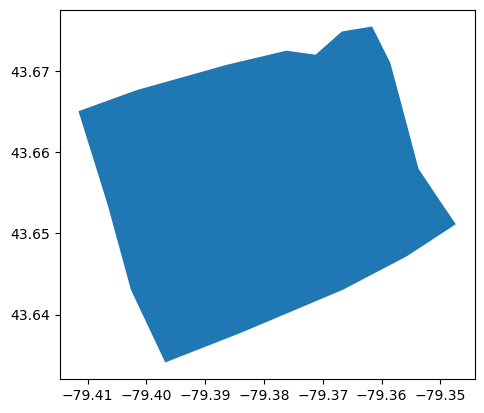

In [84]:
# Create and load the shape file for downtown toronto 
# Created and exported the shape file using this website: (https://geojson.io/#new&map=2/0/20)
gdf2 = gpd.read_file('downtown_toronto_shape.geojson')

# Plot the boundaries and check accuracy
gdf2.plot()

In [85]:
# Filter listings for downtown Toronto using latitude, longitude coordinates (recommended for later step)
shapefile_path = "POLYGON.shx"
downtown_shapefile = gpd.read_file(shapefile_path)

df1['geometry'] = df1.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

gdf = gpd.GeoDataFrame(df1, geometry='geometry')

df1['is_downtown'] = gdf['geometry'].within(downtown_shapefile.union_all())
df1_downtown = df1[df1['is_downtown'] == True]

df1_downtown.head()

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,number_of_listings_x,number_of_listings_y,geometry,is_downtown
4,3924719.0,Kensington and The Deep Blue Sea,14405518,Kensington-Chinatown,43.64913,-79.40150,Private room,116.0,4,208,2024-10-22,1.68,3,164,30,3,3,POINT (-79.4015 43.64913),True
5,3925001.0,Downtown Village Furnished Room!,20334033,Church-Yonge Corridor,43.66595,-79.37850,Private room,70.0,28,81,2024-02-04,0.65,1,90,1,1,1,POINT (-79.3785 43.66595),True
9,4535652.0,Chic urban 1BD in amazing location,23518355,Bay Street Corridor,43.64923,-79.38615,Entire home/apt,99.0,30,29,2023-10-01,0.25,32,155,0,32,32,POINT (-79.38615 43.64923),True
12,26654.0,"World Class @ CN Tower, convention centre, The...",113345,Waterfront Communities-The Island,43.64608,-79.39032,Entire home/apt,155.0,28,43,2024-10-22,0.26,5,144,1,5,5,POINT (-79.39032 43.64608),True
18,45399.0,Fountain View Studio - Eaton center,195095,Bay Street Corridor,43.66123,-79.38336,Entire home/apt,150.0,28,89,2024-08-17,0.52,9,330,4,9,9,POINT (-79.38336 43.66123),True


In [86]:
# Filter listings by number of reviews
# df = df[df['number_of_reviews_ltm'] > 0]
# df

In [87]:
# Multiply all numerical columns by 1 to remove leading apostrophes
numerical_columns = df1_downtown.select_dtypes(include=['int64', 'float64']).columns

df1_downtown[numerical_columns] = df1_downtown[numerical_columns] * 1

numerical_columns = df2.select_dtypes(include=['int64', 'float64']).columns
df2[numerical_columns] = df2[numerical_columns] * 1

numerical_columns = df3.select_dtypes(include=['int64', 'float64']).columns
df3[numerical_columns] = df3[numerical_columns] * 1
df3.head()

C:\Users\vietv\AppData\Local\Temp\ipykernel_3516\4213834859.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_downtown[numerical_columns] = df1_downtown[numerical_columns] * 1


,listing_id,date,available,price,minimum_nights,maximum_nights
0,131401,2024-11-07,f,$78.00,150,400
1,131401,2024-11-08,f,$78.00,150,400
2,131401,2024-11-09,f,$78.00,150,400
3,131401,2024-11-10,f,$78.00,150,400
4,131401,2024-11-11,f,$78.00,150,400


In [88]:
# Remove dollar signs and potential commas from price
df3['corrected_price'] = df3['price'].str.replace(',', '')
df3['corrected_price'] = df3['corrected_price'].str.replace('$', '')
df3.head()

,listing_id,date,available,price,minimum_nights,maximum_nights,corrected_price
0,131401,2024-11-07,f,$78.00,150,400,78.00
1,131401,2024-11-08,f,$78.00,150,400,78.00
2,131401,2024-11-09,f,$78.00,150,400,78.00
3,131401,2024-11-10,f,$78.00,150,400,78.00
4,131401,2024-11-11,f,$78.00,150,400,78.00


In [89]:
# Convert price to float
df3['corrected_price'] = df3['corrected_price'].astype(float)

In [90]:
# Drop unneeded price column now
df3 = df3.drop('price', axis=1)

In [ ]:
# !OPTIONAL! Will take a long time depending on number of rows (this is why we needed to filter by downtown Toronto)
# Use geopy to get zipcode from latitude and longitude
zipcodes = []
geolocator = Nominatim(user_agent="toronto-airbnbs")

for index, row in df1_downtown.iterrows():
    lat, lon = row['latitude'], row['longitude']
    location = geolocator.reverse((lat, lon), exactly_one=True, timeout=1.5)
    zip_code = location.raw["address"]["postcode"]
    zipcodes.append(zip_code)

C:\Users\vietv\AppData\Local\Temp\ipykernel_3516\3963624924.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_downtown['zipcode'] = zipcodes


,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,number_of_listings_x,number_of_listings_y,geometry,is_downtown,zipcode
4,3924719.0,Kensington and The Deep Blue Sea,14405518,Kensington-Chinatown,43.64913,-79.40150,Private room,116.0,4,208,2024-10-22,1.68,3,164,30,3,3,POINT (-79.4015 43.64913),True,M5V 2B3
5,3925001.0,Downtown Village Furnished Room!,20334033,Church-Yonge Corridor,43.66595,-79.37850,Private room,70.0,28,81,2024-02-04,0.65,1,90,1,1,1,POINT (-79.3785 43.66595),True,M4Y 1H2
9,4535652.0,Chic urban 1BD in amazing location,23518355,Bay Street Corridor,43.64923,-79.38615,Entire home/apt,99.0,30,29,2023-10-01,0.25,32,155,0,32,32,POINT (-79.38615 43.64923),True,M5H 2X7
12,26654.0,"World Class @ CN Tower, convention centre, The...",113345,Waterfront Communities-The Island,43.64608,-79.39032,Entire home/apt,155.0,28,43,2024-10-22,0.26,5,144,1,5,5,POINT (-79.39032 43.64608),True,M5V 1H2
18,45399.0,Fountain View Studio - Eaton center,195095,Bay Street Corridor,43.66123,-79.38336,Entire home/apt,150.0,28,89,2024-08-17,0.52,9,330,4,9,9,POINT (-79.38336 43.66123),True,M4Y 1X4


In [98]:
# Copy zipcodes into df1_downtown

df1_downtown.loc[:, 'zipcode'] = zipcodes
df1_downtown.head()

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,number_of_listings_x,number_of_listings_y,geometry,is_downtown,zipcode,Country
4,3924719.0,Kensington and The Deep Blue Sea,14405518,Kensington-Chinatown,43.64913,-79.40150,Private room,116.0,4,208,...,1.68,3,164,30,3,3,POINT (-79.4015 43.64913),True,M5V 2B3,Canada
5,3925001.0,Downtown Village Furnished Room!,20334033,Church-Yonge Corridor,43.66595,-79.37850,Private room,70.0,28,81,...,0.65,1,90,1,1,1,POINT (-79.3785 43.66595),True,M4Y 1H2,Canada
9,4535652.0,Chic urban 1BD in amazing location,23518355,Bay Street Corridor,43.64923,-79.38615,Entire home/apt,99.0,30,29,...,0.25,32,155,0,32,32,POINT (-79.38615 43.64923),True,M5H 2X7,Canada
12,26654.0,"World Class @ CN Tower, convention centre, The...",113345,Waterfront Communities-The Island,43.64608,-79.39032,Entire home/apt,155.0,28,43,...,0.26,5,144,1,5,5,POINT (-79.39032 43.64608),True,M5V 1H2,Canada
18,45399.0,Fountain View Studio - Eaton center,195095,Bay Street Corridor,43.66123,-79.38336,Entire home/apt,150.0,28,89,...,0.52,9,330,4,9,9,POINT (-79.38336 43.66123),True,M4Y 1X4,Canada


In [92]:
# Add a new column for first three digits of postal code (Forward Sortation Area or FSA)

df1_downtown['zipcode'] = df1_downtown['zipcode'].str[:3]
df1_downtown.head()

C:\Users\vietv\AppData\Local\Temp\ipykernel_3516\2374293106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_downtown['zipcode'] = df1_downtown['zipcode'].str[:3]


,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,number_of_listings_x,number_of_listings_y,geometry,is_downtown,zipcode
4,3924719.0,Kensington and The Deep Blue Sea,14405518,Kensington-Chinatown,43.64913,-79.40150,Private room,116.0,4,208,2024-10-22,1.68,3,164,30,3,3,POINT (-79.4015 43.64913),True,M5V
5,3925001.0,Downtown Village Furnished Room!,20334033,Church-Yonge Corridor,43.66595,-79.37850,Private room,70.0,28,81,2024-02-04,0.65,1,90,1,1,1,POINT (-79.3785 43.66595),True,M4Y
9,4535652.0,Chic urban 1BD in amazing location,23518355,Bay Street Corridor,43.64923,-79.38615,Entire home/apt,99.0,30,29,2023-10-01,0.25,32,155,0,32,32,POINT (-79.38615 43.64923),True,M5H
12,26654.0,"World Class @ CN Tower, convention centre, The...",113345,Waterfront Communities-The Island,43.64608,-79.39032,Entire home/apt,155.0,28,43,2024-10-22,0.26,5,144,1,5,5,POINT (-79.39032 43.64608),True,M5V
18,45399.0,Fountain View Studio - Eaton center,195095,Bay Street Corridor,43.66123,-79.38336,Entire home/apt,150.0,28,89,2024-08-17,0.52,9,330,4,9,9,POINT (-79.38336 43.66123),True,M4Y


In [93]:
# Keep only 2024 data in calendar df3
df3 = df3[df3['date'].str[:4].astype(int) == 2024]
df3


,listing_id,date,available,minimum_nights,maximum_nights,corrected_price
0,131401,2024-11-07,f,150,400,78.0
1,131401,2024-11-08,f,150,400,78.0
2,131401,2024-11-09,f,150,400,78.0
3,131401,2024-11-10,f,150,400,78.0
4,131401,2024-11-11,f,150,400,78.0
...,...,...,...,...,...,...
8018754,1283748659279815934,2024-12-27,t,1,365,130.0
8018755,1283748659279815934,2024-12-28,t,1,365,130.0
8018756,1283748659279815934,2024-12-29,t,1,365,130.0
8018757,1283748659279815934,2024-12-30,t,1,365,130.0


In [94]:
# Randomly sample rows from the DataFrame
# df3_2024_sample = df3_2024.sample(n=1048575, random_state=42)


In [95]:
# After filtering by reviews in df1 (listings), id in df1 may not exist in calendar df3 
# if listing_id is not in df then remove it
df3 = df3[df3['listing_id'].isin(df1['id'])]


In [99]:
# Add country column to listings
df1_downtown.loc[:, 'Country'] = 'Canada'
df1_downtown

,id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,number_of_listings_x,number_of_listings_y,geometry,is_downtown,zipcode,Country
4,3.924719e+06,Kensington and The Deep Blue Sea,14405518,Kensington-Chinatown,43.649130,-79.401500,Private room,116.0,4,208,...,1.68,3,164,30,3,3,POINT (-79.4015 43.64913),True,M5V 2B3,Canada
5,3.925001e+06,Downtown Village Furnished Room!,20334033,Church-Yonge Corridor,43.665950,-79.378500,Private room,70.0,28,81,...,0.65,1,90,1,1,1,POINT (-79.3785 43.66595),True,M4Y 1H2,Canada
9,4.535652e+06,Chic urban 1BD in amazing location,23518355,Bay Street Corridor,43.649230,-79.386150,Entire home/apt,99.0,30,29,...,0.25,32,155,0,32,32,POINT (-79.38615 43.64923),True,M5H 2X7,Canada
12,2.665400e+04,"World Class @ CN Tower, convention centre, The...",113345,Waterfront Communities-The Island,43.646080,-79.390320,Entire home/apt,155.0,28,43,...,0.26,5,144,1,5,5,POINT (-79.39032 43.64608),True,M5V 1H2,Canada
18,4.539900e+04,Fountain View Studio - Eaton center,195095,Bay Street Corridor,43.661230,-79.383360,Entire home/apt,150.0,28,89,...,0.52,9,330,4,9,9,POINT (-79.38336 43.66123),True,M4Y 1X4,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21763,1.278470e+18,Beautiful Condo Downtown Toronto,108027543,Waterfront Communities-The Island,43.647020,-79.390370,Entire home/apt,502.0,1,1,...,1.00,1,256,1,1,1,POINT (-79.39037 43.64702),True,M5V 0W3,Canada
21802,1.276090e+18,Central and Chic 2 Bedroom Apt,659076865,Waterfront Communities-The Island,43.643903,-79.379991,Entire home/apt,402.0,1,1,...,1.00,1,83,1,1,1,POINT (-79.37999083 43.64390271),True,M5J 2J2,Canada
21825,1.276650e+18,Luxury Condominium with CN Tower & Lake View,584853577,Waterfront Communities-The Island,43.642110,-79.383550,Entire home/apt,218.0,2,1,...,1.00,1,352,1,1,1,POINT (-79.38355 43.64211),True,M5J 3A6,Canada
21907,1.280610e+18,Luxury HiRise 4Beds - Lake View Condo + Parking,655651751,Waterfront Communities-The Island,43.645047,-79.388882,Entire home/apt,343.0,1,1,...,1.00,1,83,1,1,1,POINT (-79.38888184 43.64504663),True,M5V 3C7,Canada


In [97]:
# Save modified excel files or save as separate csvs if the file is too large

# df1_downtown.to_csv('listings-modified.csv', index=False)
# df2.to_csv('reviews-modified.csv', index=False)
# df3_2024.to_csv('calendar-modified.csv', index=False)

# with pd.ExcelWriter('combined_airbnb_data_2023_dec.xlsx', engine='openpyxl') as writer:
# df1_downtown.to_excel(writer, sheet_name='Listings', index=False)
# df2.to_excel(writer, sheet_name='Reviews', index=False)
# df3.to_excel(writer, sheet_name='Calendar', index=False)


"with pd.ExcelWriter('combined_airbnb_data_2023_dec.xlsx', engine='openpyxl') as writer:\n    df1_downtown.to_excel(writer, sheet_name='Listings', index=False)\n    df2.to_excel(writer, sheet_name='Reviews', index=False)\n    df3.to_excel(writer, sheet_name='Calendar', index=False)\n"